<a href="https://colab.research.google.com/github/gabriel-schineider/DaSc_TelecomX/blob/main/DaSc_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extration

In [51]:
url = 'https://raw.githubusercontent.com/gabriel-schineider/DaSc_TelecomX/refs/heads/main/TelecomX_Data.json'

In [52]:
import pandas as pd

In [53]:
df = pd.read_json(url)
df.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [54]:
df_normalizados = pd.json_normalize(df.to_dict(orient='records'))
df = df_normalizados

In [55]:
df.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [56]:
df.shape

(7267, 21)

##Transformation

In [57]:
import numpy as np

In [58]:
df.head(4)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [60]:
for column in df.columns:
  print(f'Number of unique values in column "{column}" ({df[column].dtype}): {df[column].nunique()}')
  if (df[column].nunique() < 20):
    print(f'Unique values: {df[column].unique()}')
  print('\n', '-'*76,'\n')

Number of unique values in column "customerID" (object): 7267

 ---------------------------------------------------------------------------- 

Number of unique values in column "Churn" (object): 3
Unique values: ['No' 'Yes' '']

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.gender" (object): 2
Unique values: ['Female' 'Male']

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.SeniorCitizen" (int64): 2
Unique values: [0 1]

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.Partner" (object): 2
Unique values: ['Yes' 'No']

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.Dependents" (object): 2
Unique values: ['Yes' 'No']

 ---------------------------------------------------------------------

In [61]:
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [62]:
nulos = df.isnull().sum()
nulos[nulos > 0]

,0


In [63]:
vazios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
vazios[vazios > 0]

,0
Churn,224
account.Charges.Total,11


In [64]:
df_para_analise_bonus = df[df['account.Charges.Total'].str.strip() == '']
df_para_analise_bonus

# That is the reason for some have gotten more senior citizen who did not churn


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [65]:
df_para_analise = df[df['Churn'].str.strip() != '']
df_para_analise.shape

(7043, 21)

In [66]:
df_para_analise['account.Charges.Total'] = pd.to_numeric(df_para_analise['account.Charges.Total'], errors='coerce')
df_para_analise['account.Charges.Total'].dtype

/tmp/ipython-input-66-1465919892.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('float64')

In [67]:
df_para_analise['account.Charges.Total'].isnull().sum()

np.int64(11)

In [68]:
df_para_analise.dropna(axis=0, inplace=True)
df_para_analise['account.Charges.Total'].isnull().sum()

/tmp/ipython-input-68-1234719312.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



np.int64(0)

In [69]:
df_para_analise.shape

(7032, 21)

In [70]:
df = df_para_analise
df.tail(1)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.0,3707.6


In [71]:
df['account.Charges.Daily'] = ((df['account.Charges.Total'] / df['customer.tenure'])/30).round(2)
column_to_move = df.pop('account.Charges.Daily')
df.insert(21, 'account.Charges.Daily', column_to_move)

df.insert(20, 'account.Charges.Monthly', df.pop('account.Charges.Monthly'))

df.insert(2, 'customer.tenure', df.pop('customer.tenure'))

/tmp/ipython-input-71-174672643.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df.columns

Index(['customerID', 'Churn', 'customer.tenure', 'customer.gender',
       'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total', 'account.Charges.Monthly',
       'account.Charges.Daily'],
      dtype='object')

In [73]:
# Preparing the dataframe for future models and analyses.


## → ...Identifying the important Series for analysing... ←


for column in df.columns:
  print(f'Number of unique values in column "{column}" ({df[column].dtype}): {df[column].nunique()}')
  if (df[column].nunique() < 20):
    print(f'Unique values: {df[column].unique()}')
  print('\n', '-'*76,'\n')


'''
- Churn → 0 1
- Tenure
- Gender
- Senior → 0 1
- Partner → 0 1
- Dependents → 0 1
- Phone Service → 0 1
  - inside services → 0 1
- Internet Service → 0 1
  - inside services → 0 1
- Contract
- Paperles Bill → 0 1
- Payment Method
- Charges
  - total, monthly, daily
'''

# Churn → 0, 1
# customer.tenure → customer.Tenure
# customer.gender → customer.Gender
# customer.Partner → 0, 1
# customer.Dependents → 0, 1
# phone.PhoneService → 0 1
# inside services → 0 1
# internet.InternetService → 0 1
# inside services → 0 1
# account.Contract → 0 1
# account.PaperlessBilling → 0 1
# account.PaymentMethod → 0 1

Number of unique values in column "customerID" (object): 7032

 ---------------------------------------------------------------------------- 

Number of unique values in column "Churn" (object): 2
Unique values: ['No' 'Yes']

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.tenure" (int64): 72

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.gender" (object): 2
Unique values: ['Female' 'Male']

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.SeniorCitizen" (int64): 2
Unique values: [0 1]

 ---------------------------------------------------------------------------- 

Number of unique values in column "customer.Partner" (object): 2
Unique values: ['Yes' 'No']

 ---------------------------------------------------------------------------- 

Number of unique values i

'\n- Churn → 0 1\n- Tenure\n- Gender\n- Senior → 0 1\n- Partner → 0 1\n- Dependents → 0 1\n- Phone Service → 0 1\n  - inside services → 0 1\n- Internet Service → 0 1\n  - inside services → 0 1\n- Contract\n- Paperles Bill → 0 1\n- Payment Method\n- Charges\n  - total, monthly, daily\n'

In [74]:
df_para_modelo = df
df_para_modelo.head(1)

,customerID,Churn,customer.tenure,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total,account.Charges.Monthly,account.Charges.Daily
0,0002-ORFBO,No,9,Female,0,Yes,Yes,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,593.3,65.6,2.2


In [75]:
# Dar continuidade à criação de um df próprio para modelos

##Loading & Analyses

In [76]:
import matplotlib.pyplot as plt
import plotly.express as px

In [77]:
df.describe()

,customer.tenure,customer.SeniorCitizen,account.Charges.Total,account.Charges.Monthly,account.Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.162400,2283.300441,64.798208,2.159879
std,24.545260,0.368844,2266.771362,30.085974,1.006217
min,1.000000,0.000000,18.800000,18.250000,0.460000
25%,9.000000,0.000000,401.450000,35.587500,1.207500
50%,29.000000,0.000000,1397.475000,70.350000,2.350000
75%,55.000000,0.000000,3794.737500,89.862500,3.010000
max,72.000000,1.000000,8684.800000,118.750000,4.050000


In [78]:
# Graph → churn
names_churn = ['No', 'Yes']
values_churn = [(df['Churn'] == 'No').sum(), (df['Churn'] == 'Yes').sum()]

fig_1 = px.pie(df, names=names_churn, values=values_churn,
               title='Churn Distribution',
               hole=0.4
)

fig_1.update_traces(textinfo='percent+label',insidetextorientation='horizontal')

fig_1.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    showlegend=False
)

fig_1.show()

In [79]:
# Graph → gender x churn
fig_2 = px.histogram(df, x='customer.gender', color='Churn',
                     barmode='group',
                     title='Churn per gender',
                     text_auto=True
                     )

fig_2.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Gender', yaxis_title='Count'
                    )

fig_2.show()

In [80]:
# Graph → senior X churn
fig_3 = px.histogram(df, x='customer.SeniorCitizen', color='Churn',
                     barmode='group',
                     title='Churn per seniority',
                     text_auto=True
                     )

fig_3.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Senior', yaxis_title='Count',
                    )

fig_3.show()

In [81]:
# Graph → tenure x churn
fig_4 = px.histogram(df, x='customer.tenure', color='Churn',
                     barmode='group',
                     title='Churn per tenure',
                     text_auto=True
                     )


fig_4.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Tenure', yaxis_title='Count',
                    )

fig_4.show()

In [82]:
# Graph → tenure x charges/churn (total and monthly)
fig_5_1 = px.scatter(df, x='customer.tenure', y='account.Charges.Total', color='Churn',
                   title='Churn per total charges at tenure')

fig_5_1.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Tenure', yaxis_title='Total Charges',
                    )

fig_5_1.show()



fig_5_2 = px.scatter(df, x='customer.tenure', y='account.Charges.Monthly', color='Churn',
                   title='Churn per monthly charges at tenure')

fig_5_2.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Tenure', yaxis_title='Monthly Charges',
                    )

fig_5_2.show()

In [83]:
# Graph → tenure x charges/churn (monthly | tenure > 43)
df_tenure_43 = df[df['customer.tenure'] > 43]

fig_5_2 = px.scatter(df_tenure_43, x='customer.tenure', y='account.Charges.Monthly', color='Churn',
                   title='Churn per monthly charges at tenure (tenure 44+)')

fig_5_2.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Tenure', yaxis_title='Monthly Charges',
                    )

fig_5_2.show()

In [84]:
# Graph → contract x churn
fig_6 = px.histogram(df, x='account.Contract', color='Churn',
                     barmode='group',
                     title='Churn per contract type',
                     text_auto=True
                     )

fig_6.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Contracts', yaxis_title='Count',
                    )

fig_6.show()

In [85]:
# Graph → charges x contract

fig_7_1 = px.histogram(df, x='account.Contract', y='account.Charges.Total', color='Churn',
                     barmode='group',
                     title='Total Charges per Contract Type Related to Churn',
                     text_auto=True
                     )

fig_7_1.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Contract Type', yaxis_title='Charges',
                    )

fig_7_1.show()



fig_7_2 = px.histogram(df, x='account.Contract', y='account.Charges.Monthly', color='Churn',
                     barmode='group',
                     title='Monthly Charges per Contract Type Related to Churn',
                     text_auto=True
                     )

fig_7_2.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Contract Type', yaxis_title='Charges',
                    )

fig_7_2.show()

In [86]:
# Graph → paperless x churn

fig_8 = px.histogram(df, x='account.PaperlessBilling', color='Churn',
                     barmode='group',
                     title='Churn per billing type',
                     text_auto=True
                     )

fig_8.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Paperless Billing', yaxis_title='Count',
                    )

fig_8.show()

In [87]:
# Graph → paymentMethod x churn

fig_9 = px.histogram(df, x='account.PaymentMethod', color='Churn',
                     barmode='group',
                     title='Churn per payment method',
                     text_auto=True
                     )

fig_9.update_layout(font_family='Arial', font_size=16, font_color='grey',
                    title_font_size=20, title_font_color='black',
                    xaxis_title='Payment Method', yaxis_title='Count',
                    )

fig_9.show()

In [88]:
# Graph → internetService x churn

fig_10 = px.histogram(df, x='internet.InternetService', color='Churn',
                     barmode='group',
                     title='Churn per internet service',
                     text_auto=True
                     )

fig_10.update_layout(font_family='Arial', font_size=16, font_color='grey',
                     title_font_size=20, title_font_color='black',
                     xaxis_title='Internet Service Type', yaxis_title='Count',
                     )

fig_10.show()

In [89]:
# Graph → phoneService x churn

fig_11 = px.histogram(df, x='phone.PhoneService', color='Churn',
                     barmode='group',
                     title='Churn per phone service',
                     text_auto=True
                     )

fig_11.update_layout(font_family='Arial', font_size=16, font_color='grey',
                     title_font_size=20, title_font_color='black',
                     xaxis_title='Phone Service', yaxis_title='Count',
                     )

fig_11.show()

#Final Report

##Introdução:
O objetivo da análise foi identificar as possíveis causas relacionadas ao problema de evasão de clientes ("Churn"), ou seja, detectar quais são os motivos que levas os clientes cancelarem o contrato com a empresa TelecomX.

##Limpeza e Tratamento de Dados:
Descreva os passos realizados para importar, limpar e tratar os dados.
A base de dados foi importada pela API de extensão json. Para limpar e tratar os dados, tornando possível a análise, foram feitos os seguintes procedimentos:
- Conversão da coluna de cobranças totais que estava como tipo objeto para o tipo número decimal.
- Remoção das linhas, isto é, clientes, que apresentavam valores nulos

##Análise Exploratória de Dados:
Com base nos dados fornecidos pela empresa, foi identificado que:

###1. Clientes sênior têm maior taxa de evasão

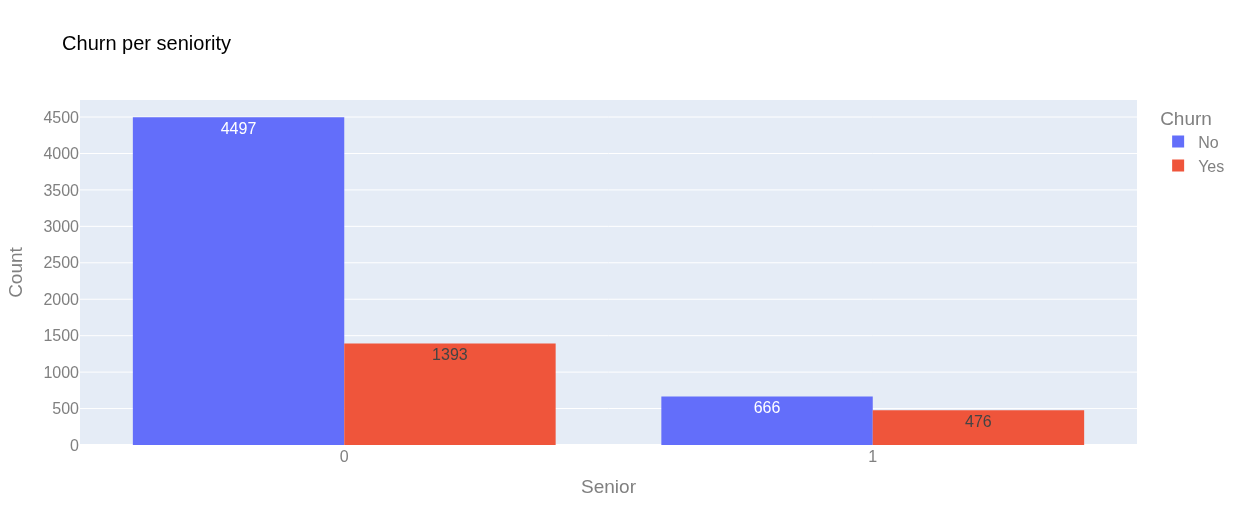

###2. Quanto maior o tempo de contrato, menor a taxa de evasão

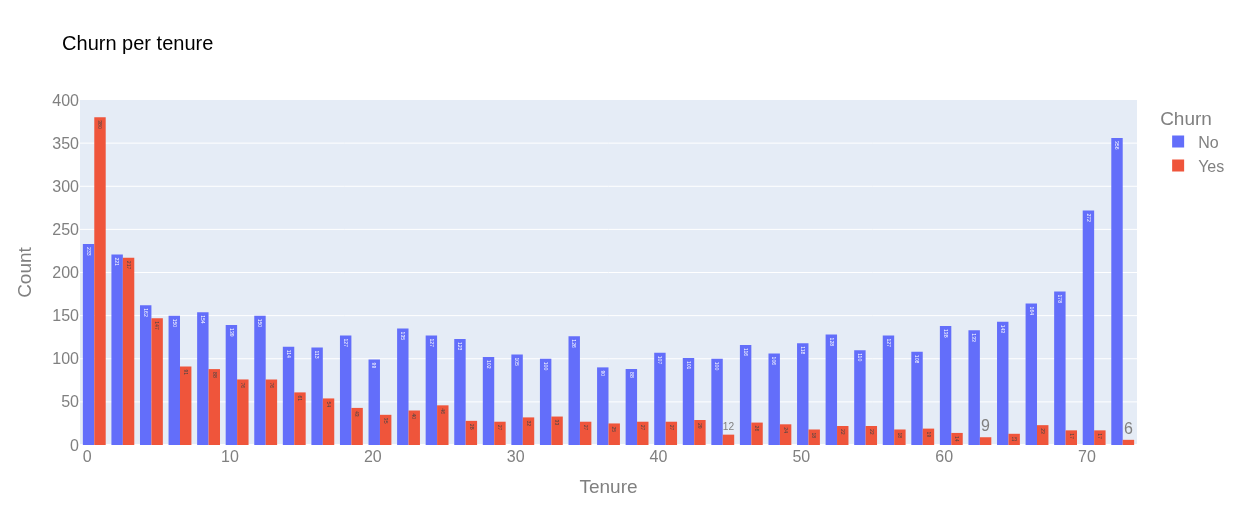

###3. Clientes com gastos mensais mais altos têm maior evasão até 43 meses de contrato. A partir do mês 44°, além da taxa de evasão já vir diminuindo, até mesmo clientes com altos gastos mensais continuam com a empresa. Desse modo, ao longo do tempo, clientes com maior gasto total ao longo do tempo tende a continuar com a empresa.

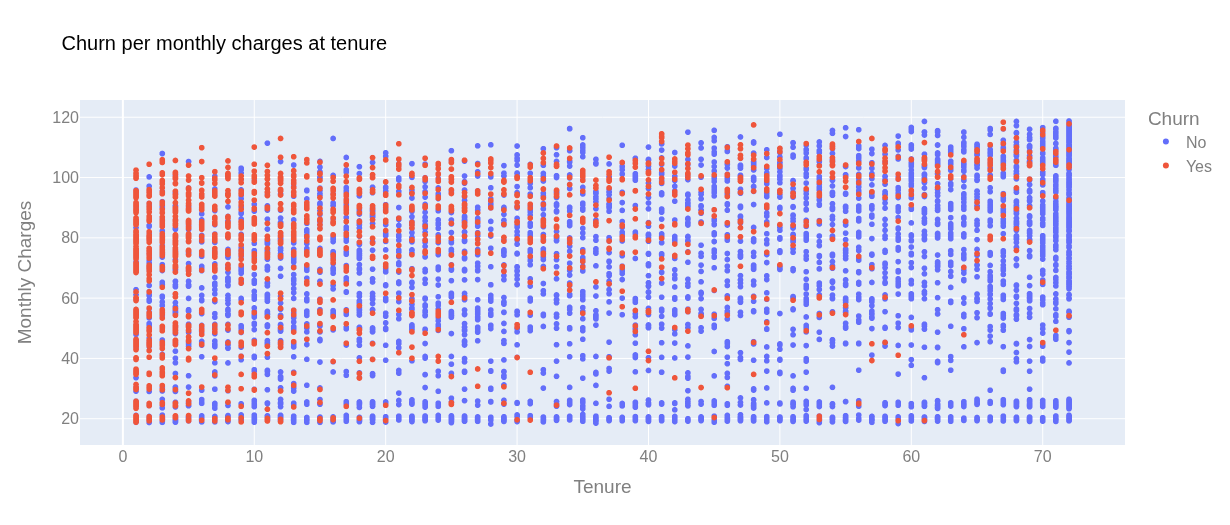

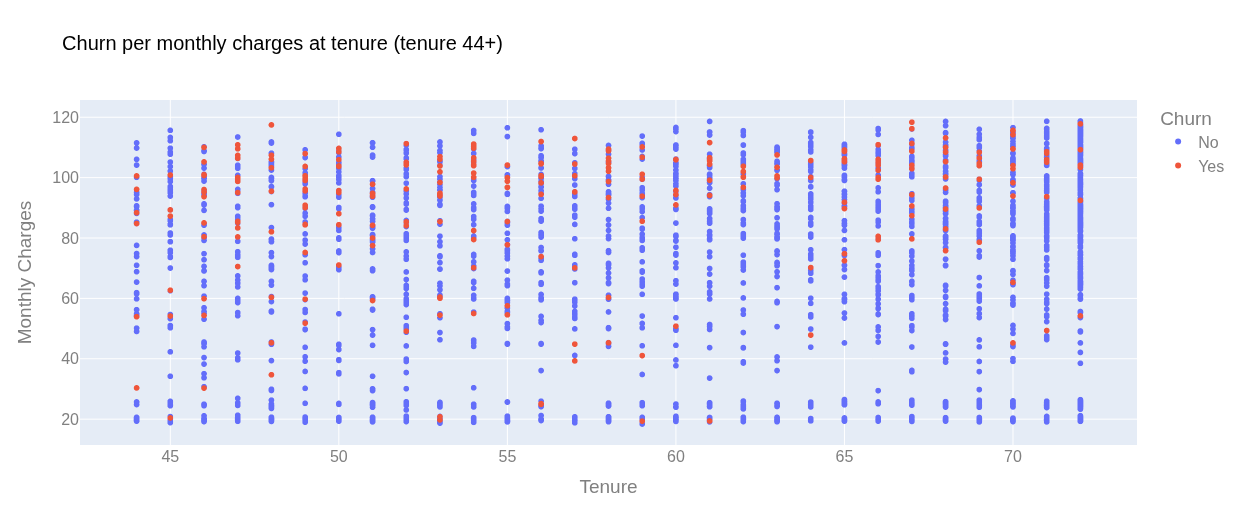

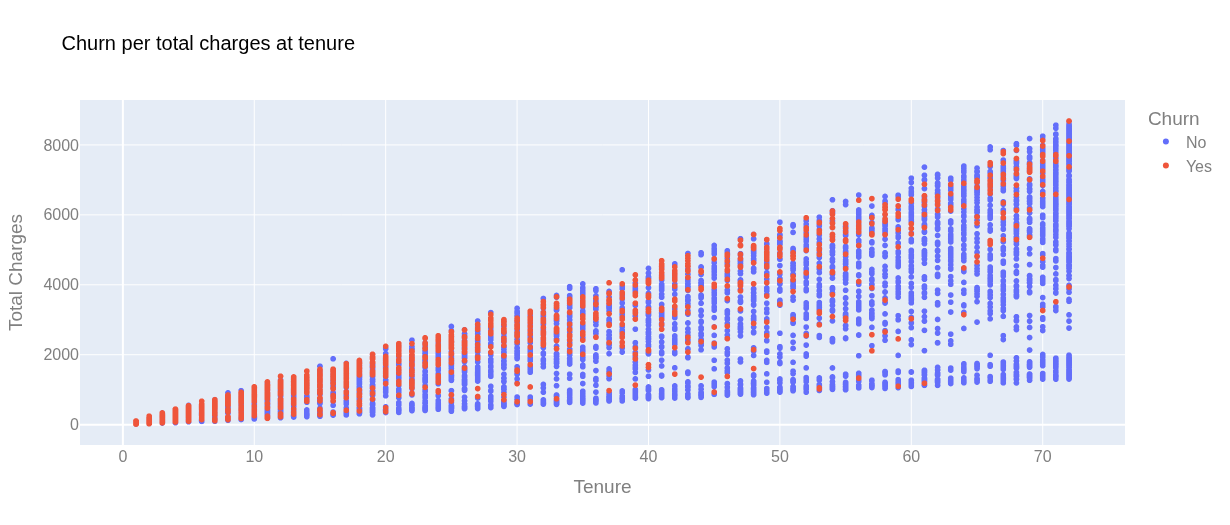

###4. Tipo de contrato interfere, sendo o mensal o tipo com a maior evasão, o anual com menos e o bienal com a menor. Paralelamente, a maior receita advém dos contratos mensais, junto, porém, das maiores "perdas" visto que, grande parte da receita obtida nesse tipo de contrato é evadida, resultando, assim, em "muito dinheiro deixado na mesa".

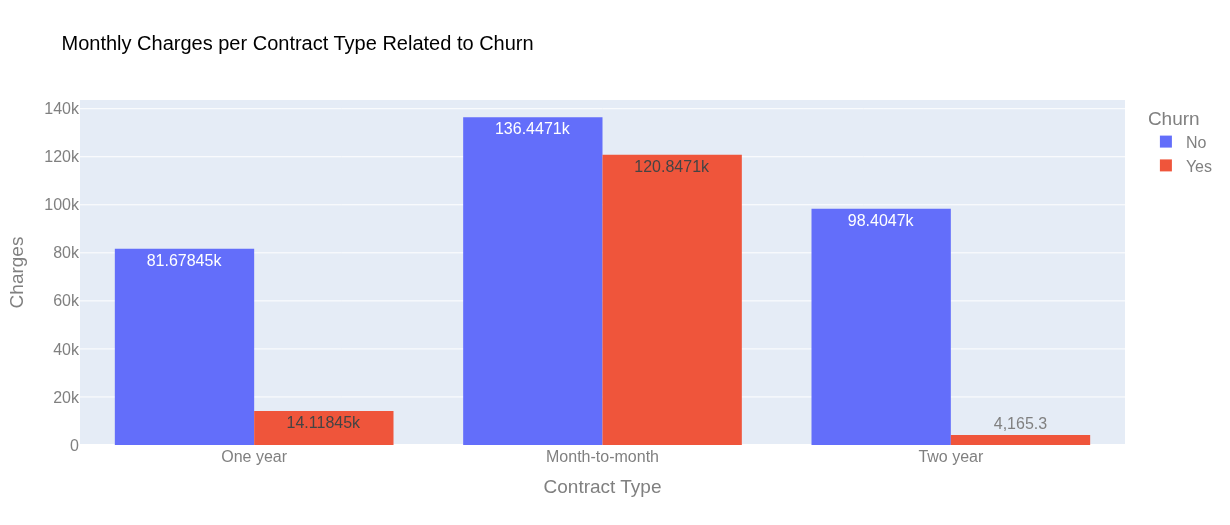

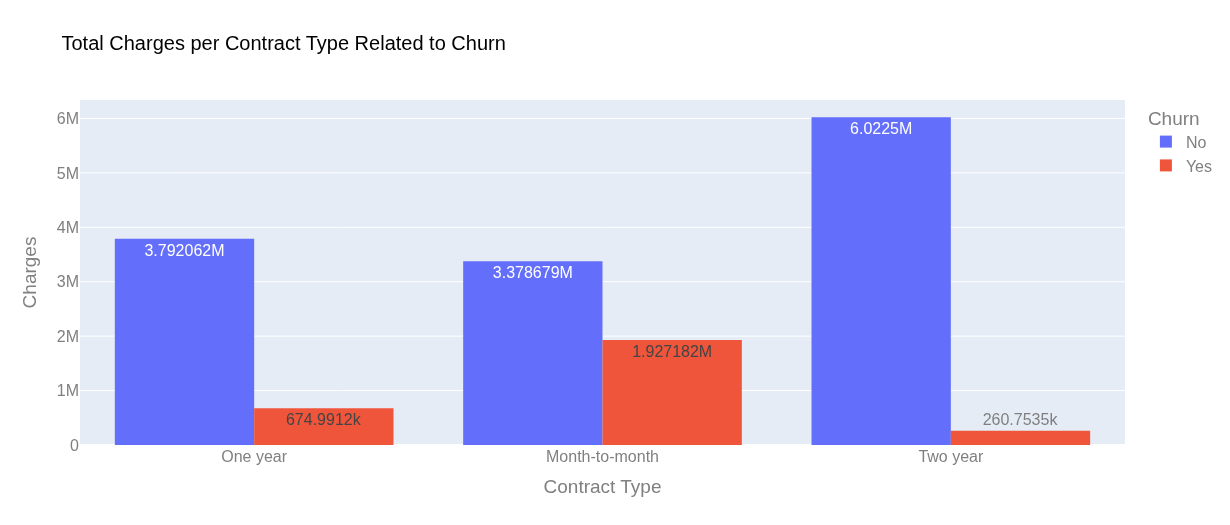

###5. Clientes que pagam por cobraça eletrônica tendem a evadir bem mais que pelos outros tipos de método de pagamento.

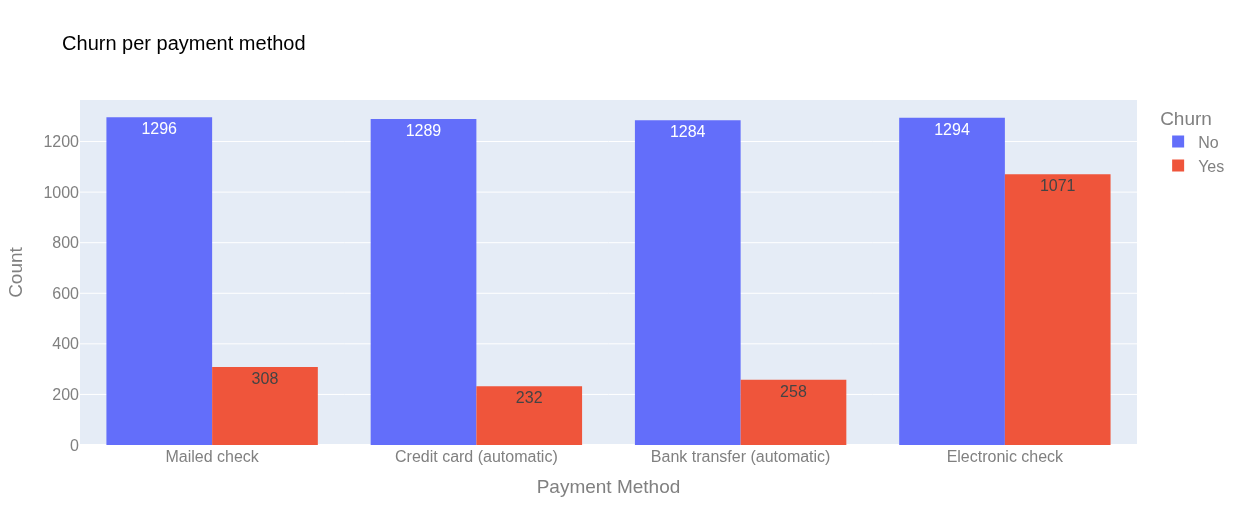

###6. Clientes com internet de fibra ótica cancelam mais do que os que optaram por outro tipo de internet.

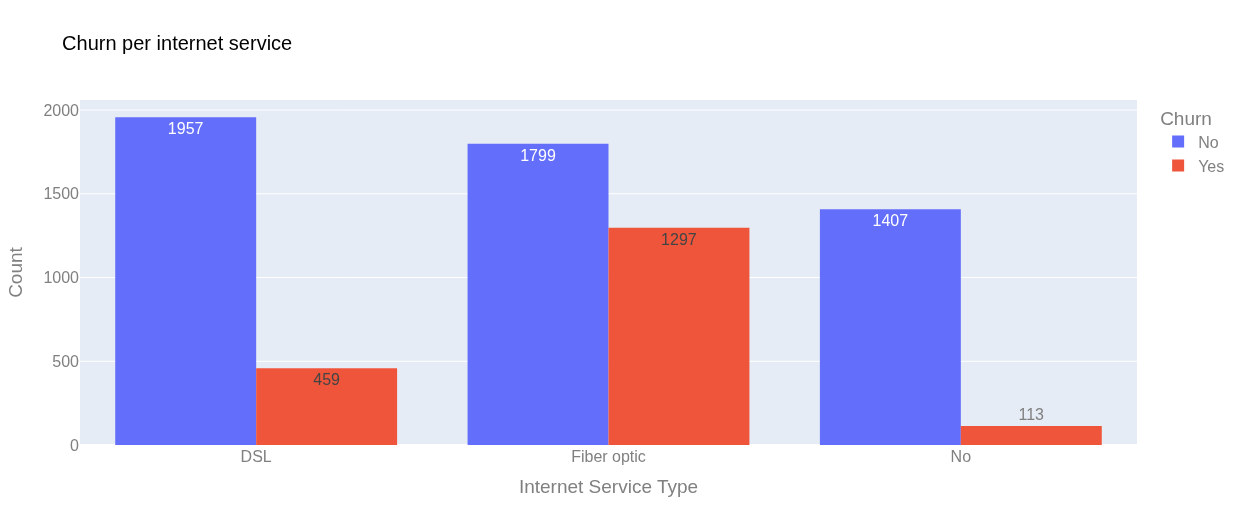

##Conclusões e Insights:
A análise exploratória realizada mostra alguns fatores críticos responsáveis por influenciar consideravelmente o comportamento de evasão dos clientes


### Sênioridade
Clientes sênior estão mais propensos à cancelarem.

A tendência pode estar relacionada a dificuldades de adaptação tecnológica, menor tolerância a falhas ou problemas de serviço e necessidades específicas não atendidas adequadamente.

###Tempo de contrato
Tempo de relacionamento com a empresa e taxa de cancelamento são inversamente proporcionais. Novos clientes evadem mais.

O período inicial é crítico para a experiência do cliente. Problemas no onboarding, expectativas não atendidas ou falta de engajamento e suporte nos primeiros meses aumentam o risco de cancelamento.





### Gastos & Serviços

Clientes com maiores gastos, ou seja, mais serviços contratados apresentam maior risco de cancelamento.

Pode ser que haja complexidade em gerenciar múltiplos serviços, gerando frustração, especialmente, diante de falhas ou cobranças não compreendidas.

### Tipo de contrato

Clientes com contratos mensais tendem a cancelar mais, enquanto clientes com contratos de longo prazo tendem a continuar com a empresa.

Contratos mensais permitem maior liberdade para o cliente cancelar quando quiser ao invés de tentar gastar tempo e energia na resolução dos eventuais problemas que surgem por conta da empresa. Por outro lado, contratos de longo prazo incentivam o cliente a querer resolver o problema e se também a acomodar-se com a empresa.

### Tipo de internet

Clientes de Fibra Ótica cancelam mais apesar de receberem um serviço superior.

Podendo indicar que clientes de fibra ótica possuem expectativas em relação a performance e qualidade maiores, tendo menos tolerância a falhas. Ou também, podem ter maior poder aquisitivo e facilidade para migrar para concorrentes.

###Método de pagamento

Clientes sem métodos de pagamento automáticos evadem mais.

Pagamentos manuais podem estar associados a maior esforço do cliente, esquecimentos ou inadimplência eventual, afetando a continuidade do serviço.

##Recomendações:

1. Implementar um programa de acolhimento personalizado para clientes sênior e recém-chegados, com foco nos primeiros 6 meses de relacionamento desses.

2. Oferecer incentivos à conversão de contratos mensais em planos anuais, promovendo maior previsibilidade e engajamento do cliente.

3. Desenvolver estratégias de retenção segmentadas com base no perfil de gasto e comportamento de uso de cada cliente.

4. Reestruturar a jornada de clientes de Fibra Ótica para alinhar expectativas com a proposta de valor percebida e reduzir frustrações.

5. Otimizar o fluxo de cobrança eletrônica tornando-a automática, com foco em clareza, agilidade e redução de inadimplência.